Instalación de librerias requerias

In [ ]:
!pip install gensim
!pip install nltk

Importación de librerías requeridas

In [ ]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pprint import pprint

import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Bidirectional, SpatialDropout1D, Input, Lambda, Flatten, Reshape, Dropout
from keras.utils import to_categorical

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, RegexpTokenizer, word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Cargar dataset

In [ ]:
# prompt: cargar un archivo desde un link de dropbox

!wget https://www.dropbox.com/scl/fi/zrpoclrf7afyz8830h3l6/password.zip?rlkey=2n42ds8pvm5vxdutvmyb2q1he&st=xhcxcsgc&dl=0
!unzip -qq password.zip?rlkey=2n42ds8pvm5vxdutvmyb2q1he

--2024-06-25 02:22:13--  https://www.dropbox.com/scl/fi/zrpoclrf7afyz8830h3l6/password.zip?rlkey=2n42ds8pvm5vxdutvmyb2q1he
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9fabe286cb5892de4ed62013d1.dl.dropboxusercontent.com/cd/0/inline/CVej7SJM9K9FH40n0ag56rsE6gtMElGCjUCeFYSrov6YU3_ip48JUpDgbJClW4qCp49UvdzamwCsaleLKk0Bes5sfI5DG8ZRJB-mKuM_Z4RXqLjxyQfvQjqv0bJoba8UO3XqLwXK5djCQC2E95EYR4bL/file# [following]
--2024-06-25 02:22:14--  https://uc9fabe286cb5892de4ed62013d1.dl.dropboxusercontent.com/cd/0/inline/CVej7SJM9K9FH40n0ag56rsE6gtMElGCjUCeFYSrov6YU3_ip48JUpDgbJClW4qCp49UvdzamwCsaleLKk0Bes5sfI5DG8ZRJB-mKuM_Z4RXqLjxyQfvQjqv0bJoba8UO3XqLwXK5djCQC2E95EYR4bL/file
Resolving uc9fabe286cb5892de4ed62013d1.dl.dropboxusercontent.com (uc9fabe286cb5892de4ed62013d1.dl.dropboxusercontent.com)... 162.125.5.15, 2620:1

Crear dataframe, describirlo, limpiar columna con elementos vacios

In [ ]:
# 1. Crear dataframe

df = pd.read_csv('top_200_password_2020_by_country.csv', sep=',')

# 2. Resumen inicial
print("Resumen inicial del DataFrame:")
print(df.info())
print(df.describe())

# 3. Revisar nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# 4. Desbalanceo de clases
# Reemplaza 'etiqueta' con el nombre de tu columna de etiquetas
if 'etiqueta' in df.columns:
    print("\nDistribución de la columna de etiquetas:")
    print(df['etiqueta'].value_counts())

# 5. Preprocesamiento
# Eliminación de filas/columnas con valores nulos (opcional)
df_clean = df.drop('Global_rank', axis=1)  # Esto elimina todas las filas con cualquier valor nulo
df_clean = df_clean.dropna()  # Esto elimina todas las filas con cualquier valor nulo
# df_clean = df.dropna(axis=1)  # Esto elimina todas las columnas con cualquier valor nulo

# Codificación de variables categóricas (si es necesario)
# Supongamos que tienes una columna categórica llamada 'categoria'
if 'categoria' in df.columns:
    df_clean = pd.get_dummies(df_clean, columns=['categoria'])

print("\nResumen después del preprocesamiento:")
print(df_clean.info())
print(df_clean.describe())

# Guardar el DataFrame preprocesado (opcional)
# df_clean.to_csv('ruta_a_tu_archivo_procesado.csv', index=False)

Resumen inicial del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_code              9800 non-null   object 
 1   country                   9800 non-null   object 
 2   Rank                      9800 non-null   int64  
 3   Password                  9800 non-null   object 
 4   User_count                9800 non-null   int64  
 5   Time_to_crack             9800 non-null   object 
 6   Global_rank               3172 non-null   float64
 7   Time_to_crack_in_seconds  9800 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 612.6+ KB
None
              Rank    User_count  Global_rank  Time_to_crack_in_seconds
count  9800.000000  9.800000e+03  3172.000000              9.800000e+03
mean    100.500000  3.468594e+04    65.337011              2.082684e+06
std      57.737251  3.659340

Función para hacer la tokenización:

- Se hace reconocimiento de palabras concretas versus otros patrones (numeros, letras concatenadas, simbolos)

- Se hace lematización de las palabras encontradas

- Se mantienen las palabras en su versión lematizada y en su versión original

In [ ]:
def tokenize(document):
    words = []
    lemmatizer = WordNetLemmatizer()
    pattern = r'[a-zA-Z]+|\d+|[^a-zA-Z\d\s]+'
    tokenizer = RegexpTokenizer(pattern)

    for sentence in sent_tokenize(document):
        tokens = word_tokenize(sentence)
        substructures = []
        for token in tokens:
            substructures += [t for t in tokenizer.tokenize(token) if len(t) > 2]

        lemmatized_tokens = [lemmatizer.lemmatize(t) if t.isalpha() else t for t in substructures]
        words += substructures
        words += lemmatized_tokens

    words = list(set(words))

    return words



Se tokenizan las passwords y se separan los datos en train y test

In [ ]:

X = df_clean['Password']
y = df_clean['Time_to_crack_in_seconds']

docs_x = []
docs_y = []
for raw_text, label in zip(X, y):
    text_tokens = tokenize(raw_text)
    docs_x += text_tokens
    docs_y += [label] * len(text_tokens)

X_train, X_test, y_train, y_test = train_test_split(docs_x, docs_y, test_size=0.2, random_state=42)

train_docs = X_train
test_docs = X_test

print(train_docs)
print(test_docs)


['654321', 'colocolo', 'Herbal', 'webhompass', 'alyssa', 'ranger', 'patrycja', 'pokemon', 'caca', 'cazzone', 'matrix', 'asdf', 'julia', 'minhtam', '2012', 'blessing', '123123', 'hola', 'naruto', 'galatasaray', 'asdfghjkl', 'yanyan', '11111111', 'sachi', 'sandra', 'internet', '1234', 'ferrari', 'unuttum', 'pace', 'adv', 'tomasz', '123789', 'prashant', 'password', 'liliana', '123123123', '123', 'qwertyuiop', 'yarakasita', 'qwe', 'lollol', '123', '784512', '1234', 'qweasd', 'qyahzn', '112233', 'lorena', 'melissa', '123', 'thehatch', 'bruno', '123', 'anders', 'rooney', 'kolettis', 'caca', 'incorrect', 'johanna', 'juanito', 'aslan', 'gregory', 'gracep', 'diablo', 'mymother', 'sophie', 'flower', 'Finn', 'daniel', 'jay', 'qaz', '1234567', 'madzia', 'michelle', '123', 'dominykas', '135246', '12345678', 'prenses', 'maurizio', 'qwaszx', 'dragon', 'aigars', 'makkara', 'pelusa', 'education', 'internet', 'benjamin', 'australia', '111222', 'asdfghjkl', 'samsung', 'timisoara', 'brandon', 'alladin', '

Normalizamos las palabras en 50 caracteres

In [ ]:
max_tokens = 50
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)
X_train_vect = pad_sequences(tokenizer.texts_to_sequences(train_docs),
                             maxlen=max_tokens, padding="post", truncating="post", value=0.)
X_test_vect = pad_sequences(tokenizer.texts_to_sequences(test_docs),
                            maxlen=max_tokens, padding="post", truncating="post", value=0.)

print(X_train_vect.shape)
print(X_test_vect.shape)

(8423, 50)
(2106, 50)


In [ ]:

inputs = Input(shape=(max_tokens,))

# Capa de embedding
embeddings_layer = Embedding(input_dim=len(tokenizer.index_word)+1,
                             output_dim=50, input_length=max_tokens,
                             trainable=True)(inputs)

x = Flatten()(embeddings_layer)

x = Dense(256, activation="relu")(x)  # Primera capa oculta con 256 neuronas
x = Dropout(0.5)(x)  # Añadir dropout para evitar el sobreajuste
x = Dense(128, activation="relu")(x)  # Segunda capa oculta con 128 neuronas
x = Dropout(0.5)(x)  # Añadir dropout para evitar el sobreajuste
x = Dense(64, activation="relu")(x)  # Tercera capa oculta con 64 neuronas

outputs = Dense(len(y), activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
history = model.fit(X_train_vect, y_train, batch_size=8, epochs=20 ) #, callbacks=[callback])

Epoch 1/20
1053/1053 [==============================] - 24s 22ms/step - loss: 2.3064 - accuracy: 0.4770
Epoch 2/20
1053/1053 [==============================] - 25s 24ms/step - loss: 1.8105 - accuracy: 0.5055
Epoch 3/20
1053/1053 [==============================] - 23s 21ms/step - loss: 1.5903 - accuracy: 0.5549
Epoch 4/20
1053/1053 [==============================] - 23s 22ms/step - loss: 1.4536 - accuracy: 0.5739
Epoch 5/20
1053/1053 [==============================] - 22s 21ms/step - loss: 1.3240 - accuracy: 0.6131
Epoch 6/20
1053/1053 [==============================] - 23s 22ms/step - loss: 1.2114 - accuracy: 0.6548
Epoch 7/20
1053/1053 [==============================] - 22s 21ms/step - loss: 1.1173 - accuracy: 0.6787
Epoch 8/20
1053/1053 [==============================] - 25s 24ms/step - loss: 1.0614 - accuracy: 0.6987
Epoch 9/20
1053/1053 [==============================] - 23s 22ms/step - loss: 0.9964 - accuracy: 0.7237
Epoch 10/20
1053/1053 [==============================] - 22s 21m

In [ ]:
# Definir el modelo
inputs = Input(shape=(max_tokens,))
embeddings_layer = Embedding(input_dim=len(tokenizer.index_word) + 1,
                             output_dim=50, input_length=max_tokens,
                             trainable=True)(inputs)
x = Conv1D(128, 5, activation='relu')(embeddings_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(len(y), activation='softmax')(x)

model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# se uso paciencia 2 por que con 3 demoraba mucho
le = LabelEncoder()
y_train = le.fit_transform(y_train)
history2 = model2.fit(X_train_vect, y_train, batch_size=8, epochs=20 )

Epoch 1/20
1053/1053 [==============================] - 27s 24ms/step - loss: 2.3024 - accuracy: 0.4777
Epoch 2/20
1053/1053 [==============================] - 25s 24ms/step - loss: 1.8334 - accuracy: 0.4877
Epoch 3/20
1053/1053 [==============================] - 24s 22ms/step - loss: 1.6765 - accuracy: 0.5322
Epoch 4/20
1053/1053 [==============================] - 26s 24ms/step - loss: 1.5160 - accuracy: 0.5648
Epoch 5/20
1053/1053 [==============================] - 27s 25ms/step - loss: 1.4189 - accuracy: 0.5953
Epoch 6/20
1053/1053 [==============================] - 24s 23ms/step - loss: 1.3116 - accuracy: 0.6330
Epoch 7/20
1053/1053 [==============================] - 24s 23ms/step - loss: 1.2442 - accuracy: 0.6570
Epoch 8/20
1053/1053 [==============================] - 24s 23ms/step - loss: 1.1718 - accuracy: 0.6657
Epoch 9/20
1053/1053 [==============================] - 25s 23ms/step - loss: 1.1210 - accuracy: 0.6815
Epoch 10/20
1053/1053 [==============================] - 24s 23m

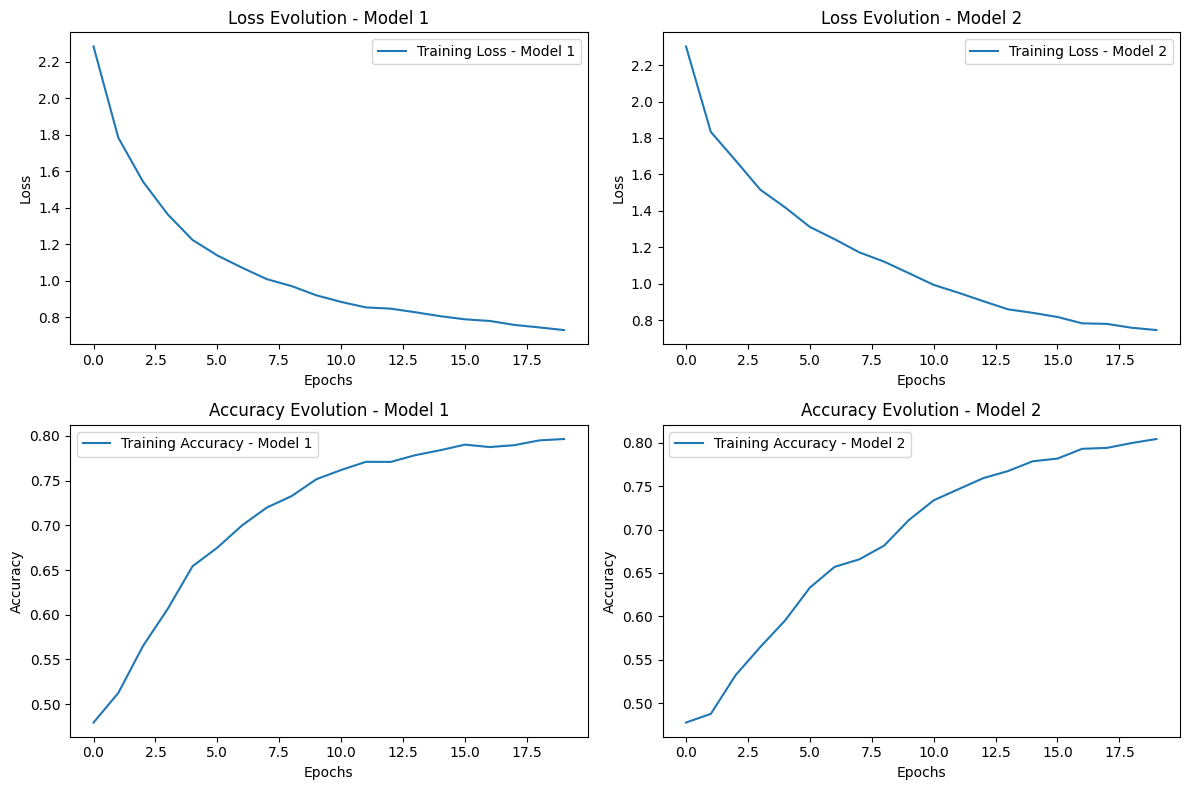

In [ ]:
# Plot the training loss and accuracy for both models
plt.figure(figsize=(12, 8))

# Plot loss for both models
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss - Model 1')
plt.title('Loss Evolution - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss - Model 2')
plt.title('Loss Evolution - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for both models
plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Training Accuracy - Model 1')
plt.title('Accuracy Evolution - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history2.history['accuracy'], label='Training Accuracy - Model 2')
plt.title('Accuracy Evolution - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from typing_extensions import final
preds_model = model.predict(X_train_vect)
preds_model2 = model2.predict(X_train_vect)
final_preds = (preds_model + preds_model2)/ 2
final_preds = np.argmax(final_preds, axis=1)
ensamble_accuracy = accuracy_score(y_train, final_preds)
print(f'Accuracy del ensamble: {ensamble_accuracy:.2f}')

264/264 [==============================] - 4s 17ms/step
Accuracy del ensamble: 0.84


In [ ]:
def predict_single_example(raw_text, model, model2):
    # Tokenizar y lematizar el ejemplo del usuario
    text_tokens = tokenize(raw_text)
    # Convertir el texto tokenizado en una cadena
    text_str = ' '.join(text_tokens)
    # Vectorizar el texto del usuario
    text_vect = pad_sequences(tokenizer.texts_to_sequences([text_str]), maxlen=max_tokens, padding="post", truncating="post", value=0.)
    # Realizar la predicción
    preds_model = model.predict(text_vect)
    preds_model2 = model2.predict(text_vect)
    final_preds = (preds_model + preds_model2)/ 2
    #final_preds = np.argmax(final_preds, axis=1)
    return final_preds[0][0]

In [ ]:
def classification_crack(time):
  if time < 0.09:
    return 'Muy segura'
  elif time < 0.6 and time >= 0.09:
    return 'Segura'
  elif time < 0.95 and time >= 0.6:
    return 'Media'
  elif time < 0.999 and time >= 0.95:
    return 'Insegura'
  else:
    return 'Muy Insegura'

In [ ]:
test_element = "1234567"
insegura = predict_single_example(test_element, model, model2)
print(insegura)


1/1 [==============================] - 0s 21ms/step
0.9999933


In [ ]:
test_element2 = "asdfu12345678"
segura = predict_single_example(test_element2, model, model2)
print(segura)

1/1 [==============================] - 0s 22ms/step
0.999982


In [ ]:
print(f'Predicción del tiempo de crackeo para "{test_element2}": {segura} \n Clasificación: {classification_crack(segura)}')
print(f'Predicción del tiempo de crackeo para "{test_element}": {insegura} \n Clasificación: {classification_crack(insegura)}')

Predicción del tiempo de crackeo para "asdfu12345678": 0.9999819993972778 
 Clasificación: Muy Insegura
Predicción del tiempo de crackeo para "1234567": 0.9999933242797852 
 Clasificación: Muy Insegura


In [ ]:
sec_pass =['rR6AzacY', 'YNBgEFD2', 'fueb3ogB', 'R59aEdaJ']
insec_pass = ['12345678', '1234asdf', 'qwer56789', 'password']
print("password seguras: ")
for pas in sec_pass:
    time = predict_single_example(pas, model, model2)
    print(pas,': ', time, ' - ', classification_crack(time))
print("\n\npasssword no seguras:")
for pas in insec_pass:
    time = predict_single_example(pas, model, model2)
    print(pas,': ', time, ' - ', classification_crack(time))


password seguras: 
1/1 [==============================] - 0s 21ms/step
rR6AzacY :  0.06711546  -  Muy segura
1/1 [==============================] - 0s 22ms/step
YNBgEFD2 :  0.06711546  -  Muy segura
1/1 [==============================] - 0s 33ms/step
fueb3ogB :  0.06711546  -  Muy segura
1/1 [==============================] - 0s 27ms/step
R59aEdaJ :  0.06711546  -  Muy segura


passsword no seguras:
1/1 [==============================] - 0s 29ms/step
12345678 :  0.999982  -  Muy Insegura
1/1 [==============================] - 0s 23ms/step
1234asdf :  0.67751443  -  Media
1/1 [==============================] - 0s 22ms/step
qwer56789 :  0.49012354  -  Segura
1/1 [==============================] - 0s 23ms/step
password :  0.85348696  -  Media


In [ ]:
# Preprocesamiento de datos
def preprocess_data(document):
    words = []
    lemmatizer = WordNetLemmatizer()
    pattern = r'[a-zA-Z]+|\d+|[^a-zA-Z\d\s]+'
    tokenizer = RegexpTokenizer(pattern)

    for sentence in sent_tokenize(document):
        tokens = word_tokenize(sentence)
        substructures = []
        for token in tokens:
            substructures += [t for t in tokenizer.tokenize(token) if len(t) > 2]

        lemmatized_tokens = [lemmatizer.lemmatize(t) if t.isalpha() else t for t in substructures]
        words += substructures
        words += lemmatized_tokens

    words = list(set(words))
    return words

# Crear diccionario y corpus a partir de los documentos
def create_corpus(documents):
    processed_texts = [preprocess_data(doc) for doc in documents]
    id2word = corpora.Dictionary(processed_texts)
    corpus = [id2word.doc2bow(text) for text in processed_texts]
    return id2word, corpus

# Entrenar modelo LDA
def train_lda_model(corpus, id2word, num_topics=10):
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics,
                         random_state=42, passes=10, alpha='auto', per_word_topics=True)
    return lda_model

documents = df['Password']
id2word, corpus = create_corpus(documents)

coherence_values = []
model_list = []
topic_range = range(1, 11)  # Adjust the range as needed

for num_topics in topic_range:
    LDAmodel = train_lda_model(corpus, id2word, num_topics=num_topics)
    model_list.append(LDAmodel)
    coherencemodel = CoherenceModel(model=LDAmodel,
                                    texts=[preprocess_data(doc) for doc in documents],
                                    dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


[(0,
  '0.090*"12345" + 0.030*"111111" + 0.027*"qwert" + 0.027*"qweasd" + '
  '0.022*"martin" + 0.020*"love" + 0.019*"linkedin" + 0.016*"hallo" + '
  '0.015*"william" + 0.015*"1111"'),
 (1,
  '0.088*"qwe" + 0.087*"123" + 0.042*"samsung" + 0.035*"666666" + '
  '0.031*"computer" + 0.028*"159753" + 0.021*"chocolate" + 0.020*"thomas" + '
  '0.019*"mercedes" + 0.016*"qazxsw"'),
 (2,
  '0.046*"123123" + 0.046*"654321" + 0.040*"dragon" + 0.037*"asdasd" + '
  '0.033*"monkey" + 0.031*"killer" + 0.029*"princess" + 0.016*"oliver" + '
  '0.014*"friend" + 0.014*"flower"'),
 (3,
  '0.062*"123456789" + 0.048*"zxcvbnm" + 0.037*"123321" + 0.028*"hello" + '
  '0.026*"lol" + 0.025*"sunshine" + 0.020*"xxx" + 0.020*"qwaszx" + '
  '0.020*"internet" + 0.018*"banana"'),
 (4,
  '0.042*"asdfghjkl" + 0.033*"welcome" + 0.025*"fuckyou" + 0.023*"qweasdzxc" + '
  '0.023*"matrix" + 0.022*"alexander" + 0.022*"121212" + 0.014*"minecraft" + '
  '0.014*"marina" + 0.013*"mustang"'),
 (5,
  '0.269*"123" + 0.042*"abc" + 0.0

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


nan


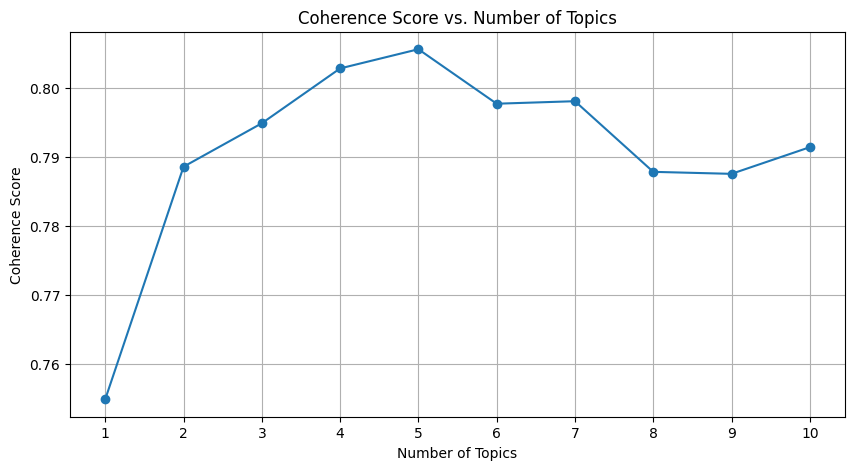

Number of Topics: 1, Coherence Score: 0.7548388377790898
Number of Topics: 2, Coherence Score: 0.7885405364632689
Number of Topics: 3, Coherence Score: 0.7948399912183765
Number of Topics: 4, Coherence Score: 0.8027882466153484
Number of Topics: 5, Coherence Score: 0.8055725061940047
Number of Topics: 6, Coherence Score: 0.7976733007122023
Number of Topics: 7, Coherence Score: 0.7980381610626279
Number of Topics: 8, Coherence Score: 0.7877981579238277
Number of Topics: 9, Coherence Score: 0.787508777420846
Number of Topics: 10, Coherence Score: 0.7913708792012664


In [ ]:
# Plot coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.grid()
plt.show()

# Print the coherence values for each number of topics
for num_topics, coherence in zip(topic_range, coherence_values):
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence}')

In [ ]:
lda_model = train_lda_model(corpus, id2word, num_topics=5)
pprint(lda_model.print_topics())
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus,
                                     dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

[(0,
  '0.052*"qwerty" + 0.032*"123456" + 0.030*"12345" + 0.017*"1234567890" + '
  '0.009*"qwert" + 0.009*"qweasd" + 0.007*"martin" + 0.007*"chocolate" + '
  '0.007*"eminem" + 0.007*"batman"'),
 (1,
  '0.066*"1234" + 0.032*"qwe" + 0.019*"qwer" + 0.019*"qwertyuiop" + '
  '0.015*"samsung" + 0.013*"asdf" + 0.013*"666666" + 0.013*"pokemon" + '
  '0.012*"computer" + 0.011*"master"'),
 (2,
  '0.034*"password" + 0.016*"iloveyou" + 0.014*"123123" + 0.014*"654321" + '
  '0.012*"abcd" + 0.012*"daniel" + 0.010*"asd" + 0.010*"killer" + '
  '0.009*"princess" + 0.007*"robert"'),
 (3,
  '0.192*"123" + 0.025*"abc" + 0.020*"123456789" + 0.016*"1234567" + '
  '0.015*"zxcvbnm" + 0.014*"asdfgh" + 0.012*"asdasd" + 0.012*"superman" + '
  '0.012*"123321" + 0.011*"monkey"'),
 (4,
  '0.019*"wsx" + 0.017*"12345678" + 0.016*"qaz" + 0.014*"987654321" + '
  '0.014*"qazwsx" + 0.013*"dragon" + 0.012*"asdfghjkl" + 0.010*"welcome" + '
  '0.009*"hello" + 0.008*"jessica"')]
nan


In [ ]:
def predict_topics(text, lda_model, id2word):
    # Preprocesar el texto del usuario
    processed_text = preprocess_data(text)
    # Convertir el texto preprocesado en una bolsa de palabras
    bow_vector = id2word.doc2bow(processed_text)
    # Obtener la distribución de tópicos
    topics = lda_model.get_document_topics(bow_vector)
    return topics

# Ejemplo de uso
test_text = "Zsertyuiopñlkmn23?"
predicted_topics = predict_topics(test_text, lda_model, id2word)

print(f'Predicción de tópicos para "{test_text}":')
for topic_num, prob in predicted_topics:
    print(f'Tópico {topic_num}: {prob}')

Predicción de tópicos para "Zsertyuiopñlkmn23?":
Tópico 0: 0.2023518830537796
Tópico 1: 0.17631520330905914
Tópico 2: 0.22039785981178284
Tópico 3: 0.19050566852092743
Tópico 4: 0.21042941510677338


In [ ]:
from os import times
# Obtener los dos tópicos más probables y sus palabras
def predict_top_two_topics_and_words(text, lda_model, id2word, num_words=10):
    processed_text = preprocess_data(text)
    bow_vector = id2word.doc2bow(processed_text)
    topics = lda_model.get_document_topics(bow_vector)
    sorted_topics = sorted(topics, key=lambda x: x[1], reverse=True)
    top_two_topics = sorted_topics[:1]

    top_two_words = []
    for topic_num, prob in top_two_topics:
        words = lda_model.show_topic(topic_num, num_words)
        top_two_words.append((topic_num, prob, words))

    return top_two_words

# Predecir tópicos para un texto proporcionado por el usuario
test_text = "123456789"
#test_text = "asdfu12345678"
top_two_topics_and_words = predict_top_two_topics_and_words(test_text, lda_model, id2word)

words_in_password = []
print(f'Predicción de los dos tópicos más probables y sus palabras para "{test_text}":')
for topic_num, prob, words in top_two_topics_and_words:
    print(f'Tópico {topic_num}: {prob}')
    for word, weight in words:
        print(f'  {word}: {weight}')
        time = predict_single_example(word, model, model2)
        classification = classification_crack(time)
        print(word,': ', time, ' - ', classification)
        words_in_password += [classification]

Predicción de los dos tópicos más probables y sus palabras para "123456789":
Tópico 3: 0.5843244194984436
  123: 0.19215191900730133
1/1 [==============================] - 0s 24ms/step
123 :  0.5214272  -  Segura
  abc: 0.025099361315369606
1/1 [==============================] - 0s 22ms/step
abc :  0.9425041  -  Media
  123456789: 0.019909441471099854
1/1 [==============================] - 0s 23ms/step
123456789 :  0.99999946  -  Muy Insegura
  1234567: 0.01626231148838997
1/1 [==============================] - 0s 21ms/step
1234567 :  0.9999993  -  Muy Insegura
  zxcvbnm: 0.015259264037013054
1/1 [==============================] - 0s 22ms/step
zxcvbnm :  0.86622596  -  Media
  asdfgh: 0.013522196561098099
1/1 [==============================] - 0s 23ms/step
asdfgh :  0.9999997  -  Muy Insegura
  asdasd: 0.012367411516606808
1/1 [==============================] - 0s 26ms/step
asdasd :  0.5012917  -  Segura
  superman: 0.012006258592009544
1/1 [==============================] - 0s 28ms/st

https://1password.com/es/password-generator/

In [ ]:
def classification(words):
  muy_segura = words.count('Muy segura')*3
  segura = words.count('Segura')*5
  media = words.count('Media')*7
  insegura = words.count('Insegura')*10
  muy_insegura = words.count('Muy Insegura')*15
  suma = muy_segura + segura + media + insegura + muy_insegura
  if suma == 30:
    return 'Muy segura'
  elif suma >= 30 and suma < 35:
    return 'Segura'
  elif suma >= 35 and suma < 55:
    return 'Media'
  elif suma >= 55 and suma < 70:
    return 'Insegura'
  else:
    return 'Muy Insegura'


In [ ]:
classification(words_in_password)

'Muy Insegura'